# Summary
In this tutorial you established a connection to a DB2 database on Cloud database from a Python notebook using ibm_db API.

In [15]:
import ibm_db # importing ibm data base module.

In [16]:
# Identify the database connection credentials.
# Enter the Data Base connection details:

dsn_hostname = "dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "npm51420"      # e.g. "abc12345"
dsn_pwd = "3t4pklp@ptp8pgr9"     # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

# We can get these connection details from db2 service in IBM Cloud - Services, create new credentials and get the connection details.

In [17]:
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=npm51420;PWD=3t4pklp@ptp8pgr9;


In [18]:
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  npm51420 on host:  dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net


In [19]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [20]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0500
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [8]:
# Close the Connection:

ibm_db.close(conn)

True

In [21]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

In [22]:
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

createStmt = ibm_db.exec_immediate(conn,createQuery)

In [23]:
#Construct the query - replace ... with the insert statement
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [24]:
#replace ... with the insert statement that inerts the remaining two rows of data

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

#execute the statement

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [25]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [26]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


In [27]:
#write and execute an update statement that changes the Rav's CITY to MOOSETOWN

updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

# Retrieve data using pandas

In [28]:
import pandas
import ibm_db_dbi

In [29]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [30]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

'Ahuja'

In [31]:
#print the entire data frame
pdf

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [32]:
pdf.shape

(3, 5)

# Accessing Databases with SQL Magic

To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the ipython-sql extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the reload___ext magic to load the ipython-sql extension. In the lab environemnt install ipython-sql extension and ibm_db_sa driver.

In [33]:
%reload_ext sql

In [34]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

In [35]:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "npm51420"      # e.g. "abc12345"
dsn_pwd = "3t4pklp@ptp8pgr9"     # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

# We can get these connection details from db2 service in IBM Cloud - Services, create new credentials and get the connection details.

In [36]:
%sql ibm_db_sa://npm51420:3t4pklp%40ptp8pgr9@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB

DB2/LINUXX8664


For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.

In [37]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48)

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "NPM51420.INTERNATIONAL_STUDENT_TEST_SCORES" of type "TABLE".  SQLSTATE=42710\r SQLCODE=-601')
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: http://sqlalche.me/e/13/f405)


# Using Python Variables in your SQL Statements
You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.
For example, if I have a python variable country with a value of "Canada", I can use this variable in a SQL query to find all the rows of students from Canada.

In [10]:
country = "Canada"
INTERNATIONAL_STUDENT_TEST_SCORES = %sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


# Assigning the Results of Queries to Python Variables
You can use the normal python assignment syntax to assign the results of your queries to python variables.
For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable test_score_distribution using the = operator.

In [11]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "as" was found following "SELECT test_score ".  Expected tokens may include:  "AND".  SQLSTATE=42601\r SQLCODE=-104')
[SQL: SELECT test_score as Test Score, count(*) as Frequency from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;]
(Background on this error at: http://sqlalche.me/e/13/f405)


# Converting Query Results to DataFrames
You can easily convert a SQL query result to a pandas dataframe using the DataFrame() method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.

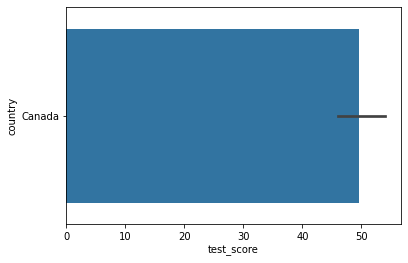

In [12]:
dataframe = INTERNATIONAL_STUDENT_TEST_SCORES.DataFrame()

%matplotlib inline
import seaborn

plot = seaborn.barplot(x='test_score',y='country', data=dataframe)

In [13]:
%%sql

SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


In [14]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "END-OF-STATEMENT" was found following "o_socioeconomic_data".  Expected tokens may include:  "JOIN <joined_table>".  SQLSTATE=42601\r SQLCODE=-104')
[SQL: PERSIST chicago_socioeconomic_data]
(Background on this error at: http://sqlalche.me/e/13/f405)


In [15]:
# limit attribute:

%sql SELECT * FROM chicago_socioeconomic_data limit 5;  # limit attribute is used to limit the number of rows.

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "NPM51420.CHICAGO_SOCIOECONOMIC_DATA" is an undefined name.  SQLSTATE=42704\r SQLCODE=-204')
[SQL: SELECT * FROM chicago_socioeconomic_data limit 5;]
(Background on this error at: http://sqlalche.me/e/13/f405)


In [44]:
# query to retrieve list of all tables in the database for your db2 schema (username):

%sql select * from SYSCAT.TAbLES where TABSCHEMA = 'npm51420'

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks


In [13]:
# query to retrieve list of all tables in the database for your db2 schema (username):

%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA='npm51420'   # npm51420 is schema or username.

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "#" was found following "TABSCHEMA=\'npm51420\'".  Expected tokens may include:  "LEFT_BRACKET".  SQLSTATE=42601\r SQLCODE=-104')
[SQL: select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA='npm51420' # npm51420 is schema or username.]
(Background on this error at: http://sqlalche.me/e/13/f405)


In [40]:
# #In Db2 the system catalog table called SYSCAT.COLUMNS contains the column metadata:
# query to retrieve the number of columns in the table

%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'INTERNATIONAL_STUDENT_TEST_SCORES'

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
4


In [41]:
# query to retrieve all column names in the table along with their datatypes and length:

%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'INTERNATIONAL_STUDENT_TEST_SCORES'

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


colname,typename,length
COUNTRY,VARCHAR,50
FIRST_NAME,VARCHAR,50
LAST_NAME,VARCHAR,50
TEST_SCORE,INTEGER,4


In [42]:
# or use this query for same result:

%sql select distinct(NAME), COLTYPE, LENGTH from SYSIBM.SYSCOLUMNS where TBNAME = 'INTERNATIONAL_STUDENT_TEST_SCORES'

 * ibm_db_sa://npm51420:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name,coltype,length
COUNTRY,VARCHAR,50
FIRST_NAME,VARCHAR,50
LAST_NAME,VARCHAR,50
TEST_SCORE,INTEGER,4
